# EDA: Dataset Kartu Pokémon Asli vs. Palsu

Notebook ini bertujuan untuk melakukan Analisis Data Eksplorasi (EDA) pada dataset gambar kartu Pokémon untuk memahami karakteristik yang membedakan kartu asli (real) dan palsu (fake).

## 1. Data Acquisition

### 1.1 Penjelasan Library yang Digunakan
- **os & glob**: Untuk berinteraksi dengan sistem file, yaitu membaca struktur folder dan menemukan path semua file gambar.
- **pandas**: Untuk membuat DataFrame yang berisi path file dan labelnya (real/fake).
- **matplotlib & seaborn**: Untuk visualisasi data, seperti menampilkan contoh gambar dan plot distribusi.
- **PIL (Pillow)**: Pustaka untuk membuka dan memanipulasi file gambar.

In [1]:
# Library untuk sistem file
import os
import glob

# Library untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk memproses gambar
from PIL import Image

%matplotlib inline
print("Library siap digunakan!")

Library siap digunakan!


### 1.2 Memuat Path Gambar dan Label
Kita hanya akan fokus pada data training untuk EDA, sesuai dengan praktik terbaik dalam machine learning. Data `test` akan kita simpan untuk evaluasi model nanti. Pastikan Anda telah mengekstrak file zip dari Kaggle dan menempatkan folder `pokemon-cards-dataset` di dalam folder `data`.

In [25]:
# Tentukan path utama ke folder data training dan file label
train_img_path = 'data/train/'
train_labels_path = 'data/train_labels.csv'

# 1. Muat file CSV yang berisi label
labels_df = pd.read_csv(train_labels_path)

# ====================================================================
# BAGIAN YANG DIPERBAIKI: Hanya mengubah ID menjadi string, tanpa 'zfill'
# ====================================================================
labels_df['id'] = labels_df['id'].astype(str)

# 3. Buat kolom 'filepath' yang berisi path lengkap ke setiap gambar
labels_df['filepath'] = labels_df['id'].apply(lambda x: os.path.join(train_img_path, x + '.jpg'))

# 4. Ganti label numerik (0, 1) menjadi teks ('real', 'fake')
label_map = {0: 'real', 1: 'fake'}
labels_df['label'] = labels_df['label'].map(label_map)

# 5. Buat DataFrame akhir yang akan kita gunakan untuk analisis
df = labels_df[['filepath', 'label']].copy()

# Acak urutan data dalam DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("DataFrame berhasil dibuat ulang dengan path yang benar.")
df.head()

DataFrame berhasil dibuat ulang dengan path yang benar.


,filepath,label
0,data/train/328.jpg,fake
1,data/train/34.jpg,real
2,data/train/16.jpg,real
3,data/train/315.jpg,fake
4,data/train/58.jpg,real


## 2. Data Profiling / Exploratory Data Analysis (EDA)

### 2.1 Analisis Distribusi Kelas (Asli vs. Palsu)
Melihat perbandingan jumlah gambar antara kartu asli dan palsu.

Jumlah gambar per label:
label
fake    250
real    123
Name: count, dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_60972\604340585.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')


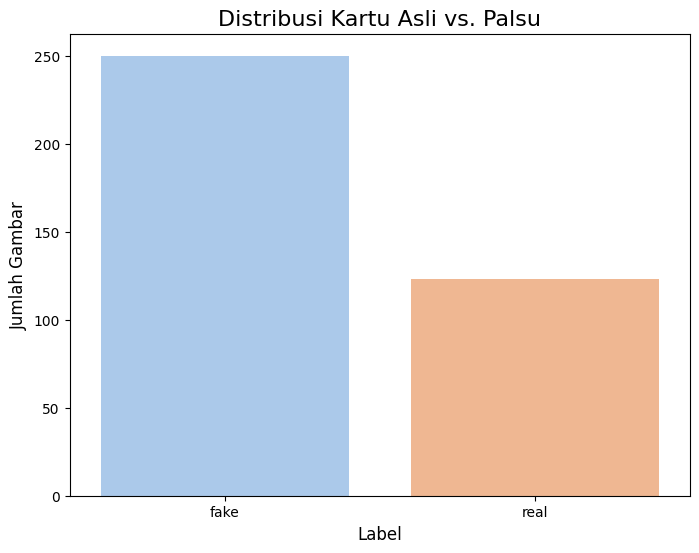

In [26]:
print("Jumlah gambar per label:")
print(df['label'].value_counts())

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette='pastel')
plt.title('Distribusi Kartu Asli vs. Palsu', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Jumlah Gambar', fontsize=12)
plt.show()

**Interpretasi**: Dataset ini memiliki sedikit ketidakseimbangan, di mana jumlah kartu palsu (fake) lebih banyak daripada kartu asli (real). Ini perlu diperhatikan saat evaluasi model nanti.

### 2.2 Visualisasi Contoh Gambar
Melihat perbedaan visual antara kartu asli dan palsu.

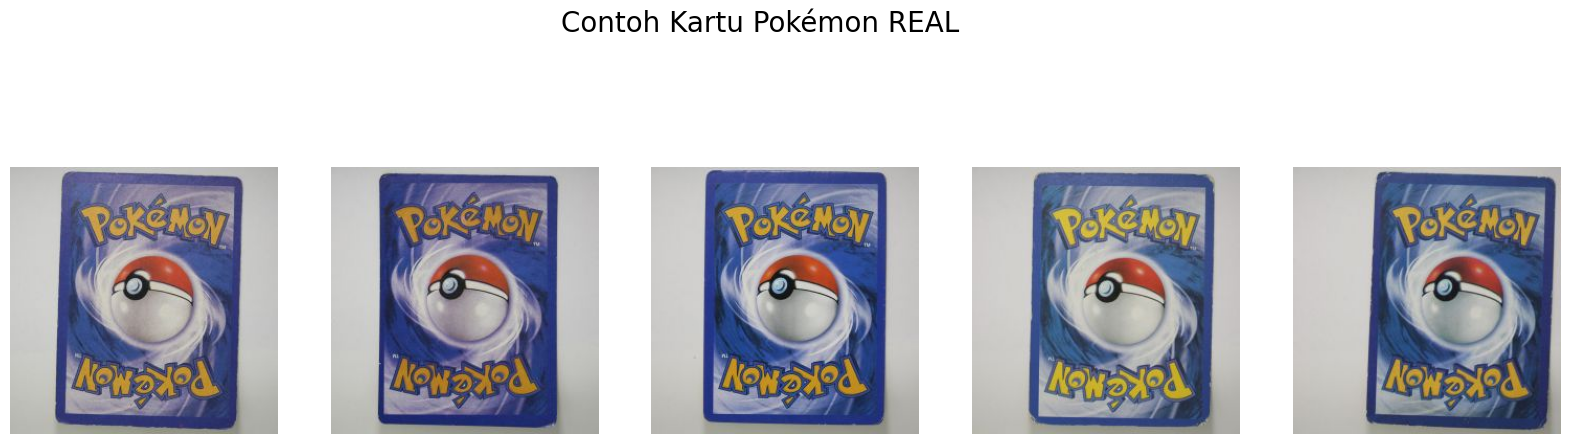

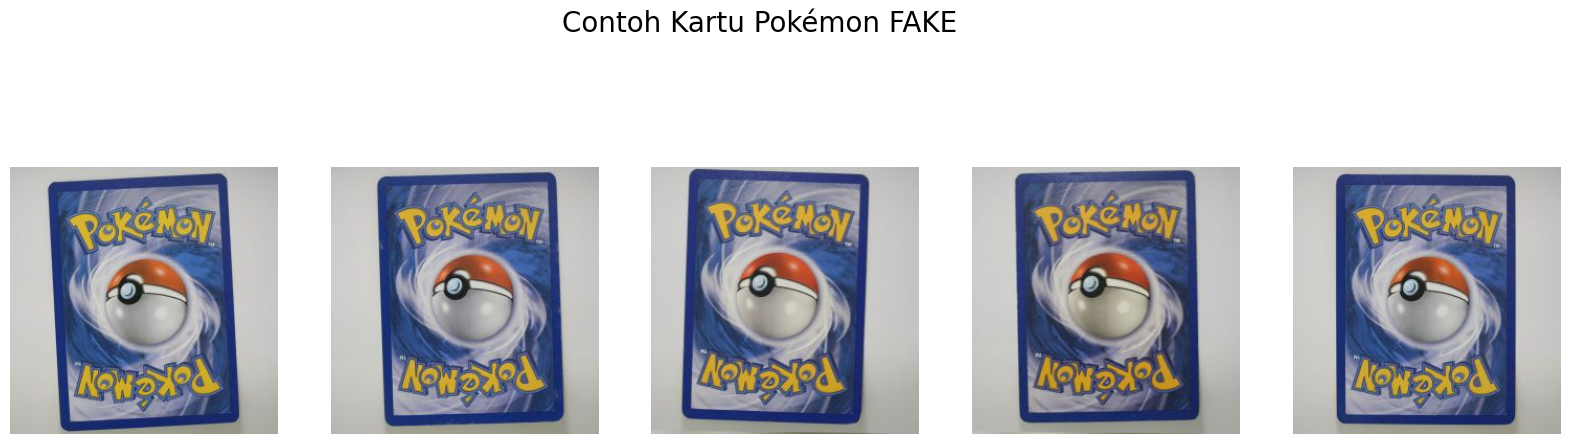

In [27]:
# Fungsi untuk menampilkan contoh gambar
def tampilkan_contoh_gambar(label_name, jumlah=5):
    plt.figure(figsize=(20, 6))
    
    # Mengambil sampel acak berdasarkan label yang benar dari DataFrame
    contoh_files = df[df['label'] == label_name].sample(jumlah, random_state=1)['filepath'].values
    
    plt.suptitle(f'Contoh Kartu Pokémon {label_name.upper()}', fontsize=20)
    
    for i, file_path in enumerate(contoh_files):
        ax = plt.subplot(1, jumlah, i + 1)
        try:
            img = Image.open(file_path)
            plt.imshow(img)
        except FileNotFoundError:
            # Menampilkan pesan error jika file tidak ditemukan
            print(f"File tidak ditemukan di: {file_path}")
            ax.text(0.5, 0.5, 'File Not Found', ha='center', va='center')
        
        plt.axis('off')
    
    plt.show()

# =======================================================
# KODE PERBAIKAN: Gunakan 'real' dan 'fake' (huruf kecil)
# =======================================================

# Tampilkan contoh untuk kartu ASLI
tampilkan_contoh_gambar('real')

# Tampilkan contoh untuk kartu PALSU
tampilkan_contoh_gambar('fake')

**Interpretasi**: Secara visual, kita mungkin bisa melihat perbedaan dalam saturasi warna, kualitas cetak, atau jenis font antara kartu asli dan palsu.

### 2.3 Analisis Dimensi (Ukuran) Gambar
Memeriksa apakah semua gambar di dataset kita memiliki ukuran yang sama, karena ini penting untuk input model.

In [21]:
# Fungsi untuk mendapatkan dimensi (lebar, tinggi) dari sebuah gambar
def get_dimensi(file_path):
    try:
        with Image.open(file_path) as img:
            return img.size # Mengembalikan tuple (lebar, tinggi)
    except:
        return (0, 0)

# Terapkan fungsi ke setiap baris dan buat kolom baru
df['dimensions'] = df['filepath'].apply(get_dimensi)

print("Ukuran Gambar yang Paling Umum:")
print(df['dimensions'].value_counts())

Ukuran Gambar yang Paling Umum:
dimensions
(0, 0)    372
Name: count, dtype: int64


**Interpretasi**: Hasil di atas menunjukkan bahwa sebagian besar gambar memiliki ukuran **(734, 1024)**. Namun, ada juga ukuran lain. Ini mengkonfirmasi bahwa kita perlu melakukan **resizing** (penyeragaman ukuran) pada tahap preprocessing.

## 3. Kesimpulan & Langkah Selanjutnya

Dari analisis ini, kita mendapatkan beberapa poin penting:
1.  **Struktur Data**: Kita berhasil memetakan dataset gambar ke dalam DataFrame yang terstruktur.
2.  **Distribusi Kelas**: Terdapat sedikit ketidakseimbangan data yang perlu diperhatikan.
3.  **Karakteristik Gambar**: Ada perbedaan visual yang bisa diamati, dan yang terpenting, ukuran gambar tidak seragam.

**Langkah Selanjutnya:**
1.  **Data Preprocessing**: Menyeragamkan ukuran semua gambar (misal: 224x224 piksel), melakukan normalisasi nilai piksel, dan mengubah gambar menjadi format array (tensor).
2.  **Modeling**: Membangun, melatih, dan mengevaluasi model *Convolutional Neural Network* (CNN) untuk melakukan klasifikasi biner (real vs fake).